In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from pylab import title, figure, xlabel, ylabel, xticks, bar, legend, axis, savefig
from fpdf import FPDF

In [2]:
e='Assignment.xlsx'

In [3]:
movies = pd.read_excel('Assignment.xlsx',header=3)
movies
movies.drop(['Unnamed: 0'], axis = 1,inplace=True )
movies

,Student No,Name of Candidate,Registration,Grade,Gender,Name of school,Date of Birth,City of Residence,Date and time of test,Country of Residence,Extra time assistance,Question No.,Time Spent on question (sec),Score if correct,Score if incorrect,Attempt status,What you marked,Correct Answer,Outcome (Correct/Incorrect/Not Attempted),Your score
0,1,abc,32030938,2,M,YTH,2012-11-22,Tokyo,2020-12-16,Japan,No,Q1,60,2,-1,Attempted,A,A,Correct,2
1,1,abc,32030938,2,M,YTH,2012-11-22,Tokyo,2020-12-16,Japan,No,Q2,52,2,-1,Unattempted,NaN,B,Unattempted,0
2,1,abc,32030938,2,M,YTH,2012-11-22,Tokyo,2020-12-16,Japan,No,Q3,89,2,-1,Attempted,C,C,Incorrect,-1
3,1,abc,32030938,2,M,YTH,2012-11-22,Tokyo,2020-12-16,Japan,No,Q4,41,2,-1,Unattempted,NaN,D,Unattempted,0
4,1,abc,32030938,2,M,YTH,2012-11-22,Tokyo,2020-12-16,Japan,No,Q5,56,2,-1,Attempted,E,E,Correct,2
5,2,afd,92743967,3,F,rtgh,2011-11-11,Beijing,2020-12-16,China,No,Q1,43,2,-1,Attempted,A,A,Correct,2
6,2,afd,92743967,3,F,rtgh,2011-11-11,Beijing,2020-12-16,China,No,Q2,33,2,-1,Unattempted,NaN,B,Unattempted,0
7,2,afd,92743967,3,F,rtgh,2011-11-11,Beijing,2020-12-16,China,No,Q3,54,2,-1,Attempted,D,C,Incorrect,-1
8,2,afd,92743967,3,F,rtgh,2011-11-11,Beijing,2020-12-16,China,No,Q4,89,2,-1,Attempted,D,D,Correct,2
9,2,afd,92743967,3,F,rtgh,2011-11-11,Beijing,2020-12-16,China,No,Q5,34,2,-1,Attempted,E,E,Correct,2


In [5]:
s=movies['Your score']
print(s[3])
l=[]
for i in range (10):
    r=s[i]+s[i+1]+s[i+2]+s[i+3]+s[i+4]
    l.append(r)
print(l[6])
#from pandas import DataFrame
#l = DataFrame (l,columns=['Score'])
#l.iloc[1]

0
2


In [6]:
l(3)

TypeError: 'list' object is not callable

In [7]:
def fs(sn):
    c=0
    for j in range(len(l)):
        if l[sn]>l[j]:
            c=c+1
    r=(c*100)/10
    return r
c=fs(5)
c

80.0

In [8]:
from pandas import DataFrame
df = DataFrame (l,columns=['Score'])
df


,Score
0,3
1,3
2,3
3,3
4,5
5,5
6,2
7,1
8,1
9,1


In [56]:
pwd

'/home/prateek/PycharmProjects/15_working_app'

40.0
3
[2, 1]
2
0
40.0
4
[3, 1]
2
1
40.0
5
[2, 3]
2
2
40.0
5
[4, 1]
2
3
80.0
3
4
80.0
4
[3, 1]
2
5
30.0
5
[4, 1]
2
6
0.0
3
7
0.0
4
[3, 1]
2
8
0.0
4
[3, 1]
2
9


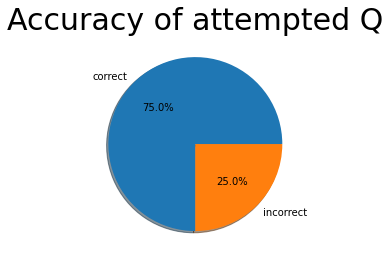

In [131]:
for i in range (0,len(movies),5):
    m=movies[i:i+5]
    z=i//5
    t=fs(z)
    print(t)
    #fig:-1
    plt.pie(m['Time Spent on question (sec)'],labels= m['Question No.'],autopct='%1.0f%%')
    plt.title('Time spent on a question', fontdict={'fontsize': 30},loc='center')
    savefig('im{}.png'.format(i))
    plt.close()
    #fig:2
    p=plt.bar( m['Question No.'],m['Time Spent on question (sec)'],)
    p=plt.legend(labels=['Time Spent on question (sec)'])
    plt.title('time(s)', fontdict={'fontsize': 30},loc='center')
    savefig('im{}.png'.format(i+1))
    plt.close()
    #fig:3
    m.rename(columns={'Question No.':'q_n'},inplace = True)
    from collections import Counter
    title_type = m.groupby('Attempt status ').agg('count')
    type_labels = title_type.q_n.sort_values().index 
    type_counts = title_type.q_n.sort_values()
    type_show_ids = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True,)
    plt.title('Attempts', fontdict={'fontsize': 30},loc='center')
    savefig('im{}.png'.format(i+2))
    plt.close()
    #fig 4
    from collections import Counter
    title_type = m.groupby('Outcome (Correct/Incorrect/Not Attempted)').agg('count')
    m.rename(columns={'Question No.':'q_n'},inplace = True)
    type_labels = title_type.q_n.sort_values().index 
    type_counts = title_type.q_n.sort_values()

    type_show_ids = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True,)
    plt.title('Overall performance of test ', fontdict={'fontsize': 30},loc='center')
    savefig('im{}.png'.format(i+3))
    plt.close()
    #fig 5
    from collections import Counter
    m.rename(columns={'Outcome (Correct/Incorrect/Not Attempted)':'out'},inplace = True)
    m.rename(columns={'Attempt status ':'a_s'},inplace = True)
    title_type = m.a_s.groupby(m.out).agg('count')
    #print(title_type)
    mc=m['a_s'].str.contains('Attempted').sum()
    print(mc)
    if mc!=5:
        if len(title_type)==3:
            d=[title_type[0],title_type[1]]
            print(d)
            v=['correct','incorrect']
            print(len(d))
            type_show_ids = plt.pie(d, labels=v, autopct='%1.1f%%', shadow=True,)
        else:
            d=[title_type[0]]
            v=['correct']
            type_show_ids = plt.pie(d, labels=v, autopct='%1.1f%%', shadow=True,)
    if mc==5:
        d=[title_type[0],title_type[1]]
        print(d)
        v=['correct','incorrect']
        print(len(d))
        type_show_ids = plt.pie(d, labels=v, autopct='%1.1f%%', shadow=True,)
    #plt.axis('equal')
    #plt.show()
    plt.title('Accuracy of attempted Q', fontdict={'fontsize': 30},loc='center')
    print(z)
    savefig('im{}.png'.format(i+4))

    
    c = [2.0, 4.0, 6.0, 8.0]
    pdf = FPDF() 
    # Add a page 
    pdf.add_page() 

    # set style and size of font  
    # that you want in the pdf 
    pdf.set_font("Arial",'UB', size = 25) 

    # create a cell 
    pdf.cell(200, 10, txt = "Wisdom Tests and Math Challenge",  ln = 1, align = 'C') 
    pdf.set_font("Arial", size = 15)
    pdf.image('Pics/{}.jpg'.format(z+1), x =150, y =None, w = 30, h = 30, type = '', link = '')
    # add another cell 
    pdf.set_font("Arial", 'BI',size = 15)
    pdf.cell(200, 10, txt = "candidate detail", ln = 2, align = 'c') 
    pdf.set_font("Arial", size = 15)
    pdf.cell(0,10,'','T',2,'C')
    pdf.cell(55,10,txt="name of candidate",border=0,ln =0,align='L')
    pdf.cell(30,10,'%s' % (m['Name of Candidate'].iloc[0]),1,0,'C')
    pdf.cell(55,10,txt="Registration No",border=0,ln =0,align='L')
    pdf.cell(30,10,'%s' % (m['Registration'].iloc[0]),1,1,'C')
    pdf.cell(55,10,'Grade',0,0,'L')
    pdf.cell(30,10,'%s' % (m['Grade '].iloc[0]),1,0,'C')
    pdf.cell(55,10,'Gender',0,0,'L')
    pdf.cell(30,10,'%s' % (m['Gender'].iloc[0]),1,1,'C')
    pdf.cell(55,10,'School Name',0,0,'L')
    pdf.cell(30,10,'%s' % (m['Name of school '].iloc[0]),1,0,'C')
    pdf.cell(55,10,'Date of birth',0,0,'L')
    pdf.cell(30,10,'%s' % (m['Date of Birth '].iloc[0].date()),1,1,'C')
    pdf.cell(55,10,'City of Residence',0,0,'L')
    pdf.cell(30,10,'%s' % (m['City of Residence'].iloc[0]),1,0,'C')
    pdf.cell(55,10,'Date of test',0,0,'L')
    pdf.cell(30,10,'%9s' % (m['Date and time of test'].iloc[0].date()),1,1,'C')
    pdf.cell(55,10,'Country of Residence',0,0,'L')
    pdf.cell(30,10,'%s' % (m['Country of Residence'].iloc[0]),1,0,'C')
    pdf.cell(55,10,'Extra Time assistance',0,0,'L')
    pdf.cell(30,10,'%s' % (m['Extra time assistance'].iloc[0]),1,1,'C')
    pdf.cell(0,10,'',0,2,'C')
    pdf.set_font("Arial", 'BI',size = 15)
    pdf.cell(200, 10, txt = "Report Card", ln = 2, align = 'c') 
    pdf.cell(0,10,'','T',2,'C')
    pdf.set_font("Arial", size = 15)
    pdf.cell(0,10,'','B',2,'C')
    pdf.cell(14,10, 'ques.','L',0,'C')
    pdf.cell(22, 10, 'Time','L',0,'C')
    pdf.cell(20, 10, 'score','L',0,'C')
    pdf.cell(17, 10, 'score','L',0,'C')
    pdf.cell(35, 10, 'Attempt','L',0,'C')
    pdf.cell(15, 10, 'what','L',0,'C')
    pdf.cell(20, 10, 'Correct','L',0,'C')
    pdf.cell(32, 10, 'Outcome','L',0,'C')
    pdf.cell(15, 10, 'Your','L',0,'C')
    pdf.cell(0,10, '','R',1,'C')
    pdf.cell(14,10, 'No.','L',0,'C')
    pdf.cell(22,10, 'spent on','L',0,'C')
    pdf.cell(20, 10, 'if ','L',0,'C')
    pdf.cell(17, 10, 'if ','L',0,'C')
    pdf.cell(35, 10, 'status','L',0,'C')
    pdf.cell(15, 10, 'you ','L',0,'C')
    pdf.cell(20, 10, 'Answer','L',0,'C')
    pdf.cell(32, 10, '','L',0,'C')
    pdf.cell(20, 10, 'score','L',0,'l')
    pdf.cell(0,10, '','R',1,'C')
    pdf.cell(14,10, '','L',0,'C')
    pdf.cell(22,10, 'question','L',0,'C')
    pdf.cell(20, 10, 'Correct','L',0,'C')
    pdf.cell(17, 10, 'worng','L',0,'C')
    pdf.cell(35, 10, '','L',0,'C')
    pdf.cell(15, 10, 'mark','L',0,'C')
    pdf.cell(20, 10, '','L',0,'C')
    pdf.cell(32, 10, '','L',0,'C')
    pdf.cell(15, 10, '','L',0,'C')
    pdf.cell(0,10, '','R',1,'C')
    pdf.set_font("Arial", size = 15)

    for x in range(5):
        pdf.cell(14,10, '%s' % (str(m['q_n'].iloc[x])),1,0,'C')
        pdf.cell(22, 10, '%s' % (m['Time Spent on question (sec)'].iloc[x]),1,0,'C')
        pdf.cell(20, 10, '%s' %(m['Score if correct'].iloc[x]),1,0,'C')
        pdf.cell(17, 10, '%s' %(m['Score if incorrect'].iloc[x]),1,0,'C')
        pdf.cell(35, 10, '%s' %(m['a_s'].iloc[x]),1,0,'C')
        pdf.cell(15, 10, '%s' %(m['What you marked'].iloc[x]),1,0,'C')
        pdf.cell(20, 10, '%s' %(m['Correct Answer'].iloc[x]),1,0,'C')
        pdf.cell(32, 10, '%s' %(m['out'].iloc[x]),1,0,'C')
        pdf.cell(15, 10, '%s' %(m['Your score'].iloc[x]),1,1,'C')
    pdf.cell(35,10,'Total Score',0,0,'C')
    pdf.cell(15, 10, '%s' % (sum(m['Your score'])),1,0,'C')
    pdf.cell(65,10,'Your overall percentile',0,0,'C')
    pdf.cell(15, 10,"{:.2f}".format(t),1,1,'C')
    pdf.add_page()
    pdf.header()
    pdf.set_font('Arial', 'UB', 24)
    pdf.cell(200, 10, txt = "Graphical Representation of ur report card",  ln = 1, align = 'C') 
    pdf.image('im{}.png'.format(i), x = 0, y =50, w = 80, h =75, type = '', link = '')
    pdf.image('im{}.png'.format(i+1), x = 100, y = 50, w = 70, h = 70,type = '', link = '')
    pdf.image('im{}.png'.format(i+2), x = 0, y = 120, w = 80, h = 75, type = '', link = '')
    pdf.image('im{}.png'.format(i+3), x = 100, y = 120, w = 80, h = 75, type = '', link = '')
    pdf.image('im{}.png'.format(i+4), x = 65, y = 190, w = 80, h = 75, type = '', link = '')
    pdf.set_font("Arial", 'BI',size = 15)
    pdf.cell(170,20, txt = "keep study improve your self by giving test on wishdom test",  ln = 1, align = 'C') 
    #pdf.cell(0,10,'','T',2,'C')
    pdf.set_font("Arial", size = 15)
    pdf.accept_page_break()
    #print(i)
    pdf.output('p{0}.pdf'.format(i))   